In [109]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
import json

In [2]:
df = pd.read_csv("medical_insurance.csv")

In [3]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
(df["sex"].value_counts()/1338)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [18]:
df["sex"].replace({"male":1,"female":0},inplace= True)

In [20]:
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [21]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: >

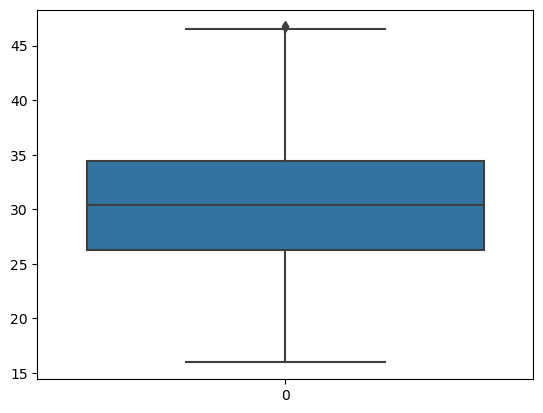

In [53]:
sns.boxplot(df["bmi"])

In [52]:
df["bmi"]
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
df["bmi"]=np.where(df["bmi"]>47.29,df["bmi"].median(),df["bmi"])

In [23]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)

In [24]:
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
df = pd.get_dummies(df,columns = ["region"])

In [27]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [31]:
x = df.drop("charges",axis = 1)
y = df["charges"]

In [32]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [34]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state = 2)

In [35]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
882,21,0,22.135,0,0,1,0,0,0
505,37,1,30.875,3,0,0,1,0,0
798,58,0,33.100,0,0,0,0,0,1
792,22,0,23.180,0,0,1,0,0,0
201,48,0,32.230,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
466,60,0,28.700,1,0,0,0,0,1
299,48,0,28.880,1,0,0,1,0,0
493,61,1,43.400,0,0,0,0,0,1
527,51,0,25.800,1,0,0,0,0,1


In [36]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
def evaluation(model,indvar,act):
    
    pred = model.predict(indvar)
    
    
    mse = mean_squared_error(act,pred)
    print("mean_squared_error : ",mse)
    
    print("*"*50)
    
    mae = mean_absolute_error(act,pred)
    print("mean_absolute_error : ",mae)
    
    print("*"*50)
    
    r2 = r2_score(act,pred)
    print("r2_score : ",r2)
    
    

In [55]:
print("testing data evaluation".center(50,"*"))
evaluation(model,x_test,y_test)

print()

print("training data evaluation".center(50,"*"))
evaluation(model,x_train,y_train)

*************testing data evaluation**************
mean_squared_error :  38304871.34868593
**************************************************
mean_absolute_error :  4279.860834219365
**************************************************
r2_score :  0.7449415564623686

*************training data evaluation*************
mean_squared_error :  36100283.869831294
**************************************************
mean_absolute_error :  4138.842762471064
**************************************************
r2_score :  0.7520187377309014


In [59]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [62]:
age=19.0
sex= 0.0
bmi=27.9
children= 0.0
smoker=1.0
region_northeast=0.0
region_northwest=0.0
region_southeast=0.0
region_southwest=1.0

test_array =np.array([[19.0,0,27.9,0,1,0,0,0,1]])
test_array

array([[19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ]])

In [106]:
model.predict([test_array])

array([25264.89470869])

In [64]:
age=19.0
sex= 0.0
bmi=27.9
children= 0.0
smoker=1.0
region_northeast=0.0
region_northwest=0.0
region_southeast=0.0
region_southwest=1.0



In [65]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [87]:
age=19.0
sex= "female"
bmi=27.9
children= 0.0
smoker="yes"
region_name = "southwest"



In [80]:
project_data = {"sex":{"male":1,"female":0},
                "smoker": {"yes":1,"no":0},
                "columns":list(x.columns)}
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [98]:
test_array = np.zeros(9)
test_array[0] = age
test_array[1] = project_data["sex"][sex]
test_array[2] = bmi
test_array[3]= children
test_array[4] = project_data["smoker"][smoker]
region_value= "region_" +region_name
test_index = project_data["columns"].index(region_value)
test_array[test_index]=1

test_array

array([19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ])

In [107]:
result = model.predict([test_array])
print(f"The Insurance Predicted for the person is {result[0].round(2)}")

The Insurance Predicted for the person is 25264.89


In [113]:
with open("Linear_model.pkl" ,"wb") as f:
    pickle.dump(model,f)

In [114]:
with open("project_data.json" ,"w") as f:
    json.dump(project_data,f)